In [125]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.applications.resnet_v2 import ResNet50V2


In [130]:
batch_size = 32
img_size = 224
data_dir = './data'

In [131]:
!cd "$data_dir" ; rm -r .ipynb_checkpoints/

In [132]:
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=40,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        subset='training',
        class_mode='categorical')
validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        subset='validation',
        class_mode='categorical')

NUM_CLASSES = 10

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


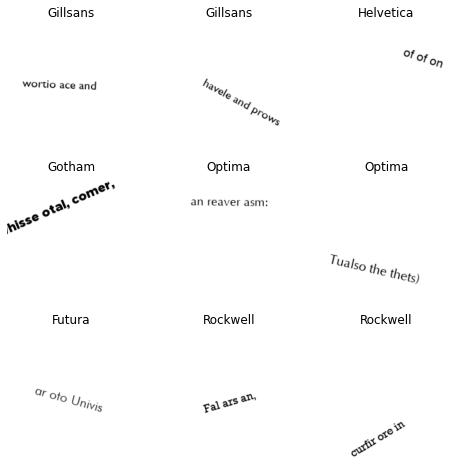

In [133]:
import matplotlib.pyplot as plt
# class name
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(8, 8))
images, labels = train_generator.next()
for i in range(9):    
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [134]:
IMAGE_RESIZE = 224
RESNET50_POOLING_AVERAGE = 'avg'
HIDDEN_LAYER_ACTIVATION = 'relu'
DENSE_LAYER_ACTIVATION = 'softmax'
LOSS_FUNCTION = 'categorical_crossentropy'

In [135]:
# load model
model = tf.keras.models.Sequential()
model.add(ResNet50V2(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = "imagenet"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(512, activation = HIDDEN_LAYER_ACTIVATION))
model.add(tf.keras.layers.Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))
# model.layers[0].trainable = False

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 2048)              23564800  
_________________________________________________________________
flatten_9 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_27 (Dense)             (None, 10)                5130      
Total params: 24,619,018
Trainable params: 24,573,578
Non-trainable params: 45,440
_________________________________________________________________


In [136]:
sgd = tf.keras.optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer = sgd,loss=LOSS_FUNCTION, metrics = 'accuracy')

In [137]:
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

Epoch 1/10


2021-12-06 18:28:55.068972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - ETA: 0s - loss: 1.0173 - accuracy: 0.5895

2021-12-06 18:33:20.762210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 296s 1s/step - loss: 1.0173 - accuracy: 0.5895 - val_loss: 2.7025 - val_accuracy: 0.3795
Epoch 2/10
250/250 [==============================] - 305s 1s/step - loss: 0.4650 - accuracy: 0.7874 - val_loss: 0.5801 - val_accuracy: 0.7705
Epoch 3/10
250/250 [==============================] - 289s 1s/step - loss: 0.3569 - accuracy: 0.8328 - val_loss: 1.0531 - val_accuracy: 0.6525
Epoch 4/10
250/250 [==============================] - 298s 1s/step - loss: 0.2996 - accuracy: 0.8548 - val_loss: 0.5453 - val_accuracy: 0.7705
Epoch 5/10
250/250 [==============================] - 382s 2s/step - loss: 0.2550 - accuracy: 0.8866 - val_loss: 0.9448 - val_accuracy: 0.7455
Epoch 6/10
250/250 [==============================] - 402s 2s/step - loss: 0.2212 - accuracy: 0.9025 - val_loss: 0.1968 - val_accuracy: 0.9140
Epoch 7/10
250/250 [==============================] - 361s 1s/step - loss: 0.1962 - accuracy: 0.9189 - val_loss: 0.5866 - val_accuracy: 0.8140
Epoch 8/10

In [141]:
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=1
)

250/250 [==============================] - 296s 1s/step - loss: 0.1124 - accuracy: 0.9543 - val_loss: 0.2479 - val_accuracy: 0.9135


In [142]:
score = model.evaluate(validation_generator, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.22882390022277832
Test accuracy: 0.9140000343322754


In [143]:
model.save('./resnet50.v1')

2021-12-06 19:39:55.971479: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./resnet50.v1/assets


/Users/jim/miniforge3/envs/tf/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
